#LOADING THE DATASET

In [43]:
import pandas as pd

In [44]:
df=pd.read_csv("/content/shopping_data.csv")

#PREPROCESSING

In [45]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53.0,NaN,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19.0,Male,Sweater,Clothing,NaN,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,NaN,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly
3,4,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,NaN,Yes,Free Shipping,Yes,Yes,31.0,PayPal,Annually


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3699 non-null   float64
 2   Gender                  3663 non-null   object 
 3   Item Purchased          3898 non-null   object 
 4   Category                3898 non-null   object 
 5   Purchase Amount (USD)   3741 non-null   float64
 6   Location                3699 non-null   object 
 7   Size                    3895 non-null   object 
 8   Color                   3897 non-null   object 
 9   Season                  3893 non-null   object 
 10  Review Rating           3896 non-null   float64
 11  Subscription Status     3895 non-null   object 
 12  Shipping Type           3896 non-null   object 
 13  Discount Applied        3899 non-null   object 
 14  Promo Code Used         3898 non-null   

In [47]:
df.isnull().sum()

,0
Customer ID,0
Age,201
Gender,237
Item Purchased,2
Category,2
Purchase Amount (USD),159
Location,201
Size,5
Color,3
Season,7


In [48]:
# Total rows
total_rows = len(df)

# Create a summary DataFrame
missing_summary = df.isnull().sum().to_frame(name='Missing Values')
missing_summary['% Missing'] = (missing_summary['Missing Values'] / total_rows * 100).round(2)

# Display only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
print(missing_summary)


                        Missing Values  % Missing
Age                                201       5.15
Gender                             237       6.08
Item Purchased                       2       0.05
Category                             2       0.05
Purchase Amount (USD)              159       4.08
Location                           201       5.15
Size                                 5       0.13
Color                                3       0.08
Season                               7       0.18
Review Rating                        4       0.10
Subscription Status                  5       0.13
Shipping Type                        4       0.10
Discount Applied                     1       0.03
Promo Code Used                      2       0.05
Previous Purchases                   1       0.03
Payment Method                       1       0.03
Frequency of Purchases               1       0.03


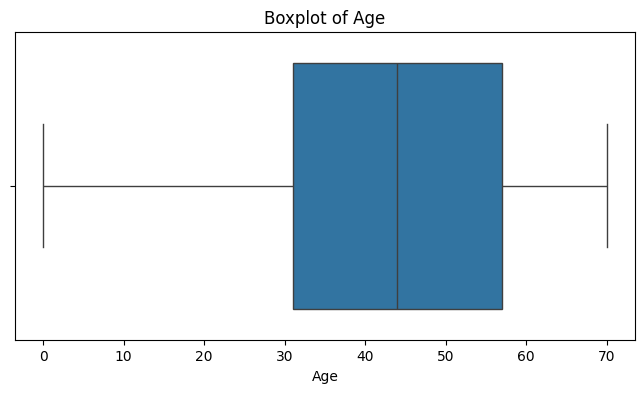

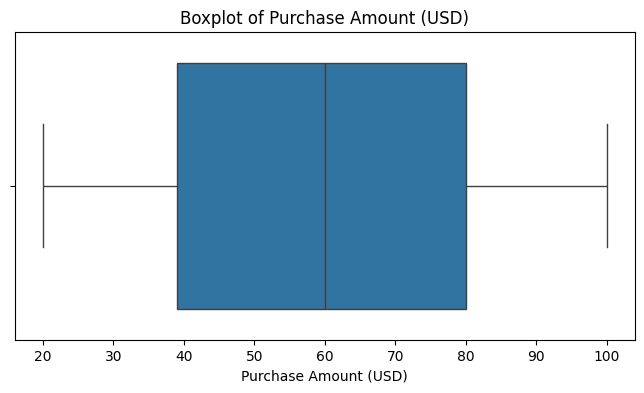

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Age
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Purchase Amount (USD)
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.title('Boxplot of Purchase Amount (USD)')
plt.show()


In [50]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

age_outliers = detect_outliers_iqr(df['Age'])
purchase_outliers = detect_outliers_iqr(df['Purchase Amount (USD)'])

print(f"Number of outliers in Age: {len(age_outliers)}")
print(f"Number of outliers in Purchase Amount (USD): {len(purchase_outliers)}")


Number of outliers in Age: 0
Number of outliers in Purchase Amount (USD): 0


In [51]:
import warnings
warnings.filterwarnings('ignore')
# Numeric columns → Median
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].mean(), inplace=True)

# Categorical columns → Mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)


In [52]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,2
Category,2
Purchase Amount (USD),0
Location,0
Size,5
Color,3
Season,7


In [53]:
df.dropna(inplace=True)

In [54]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [55]:
duplicates = df[df.duplicated()]

In [56]:
print(duplicates)

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []


In [61]:
df.dtypes

,0
Customer ID,int64
Age,float64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),float64
Location,object
Size,object
Color,object
Season,object


#OUTLIER DETECTION

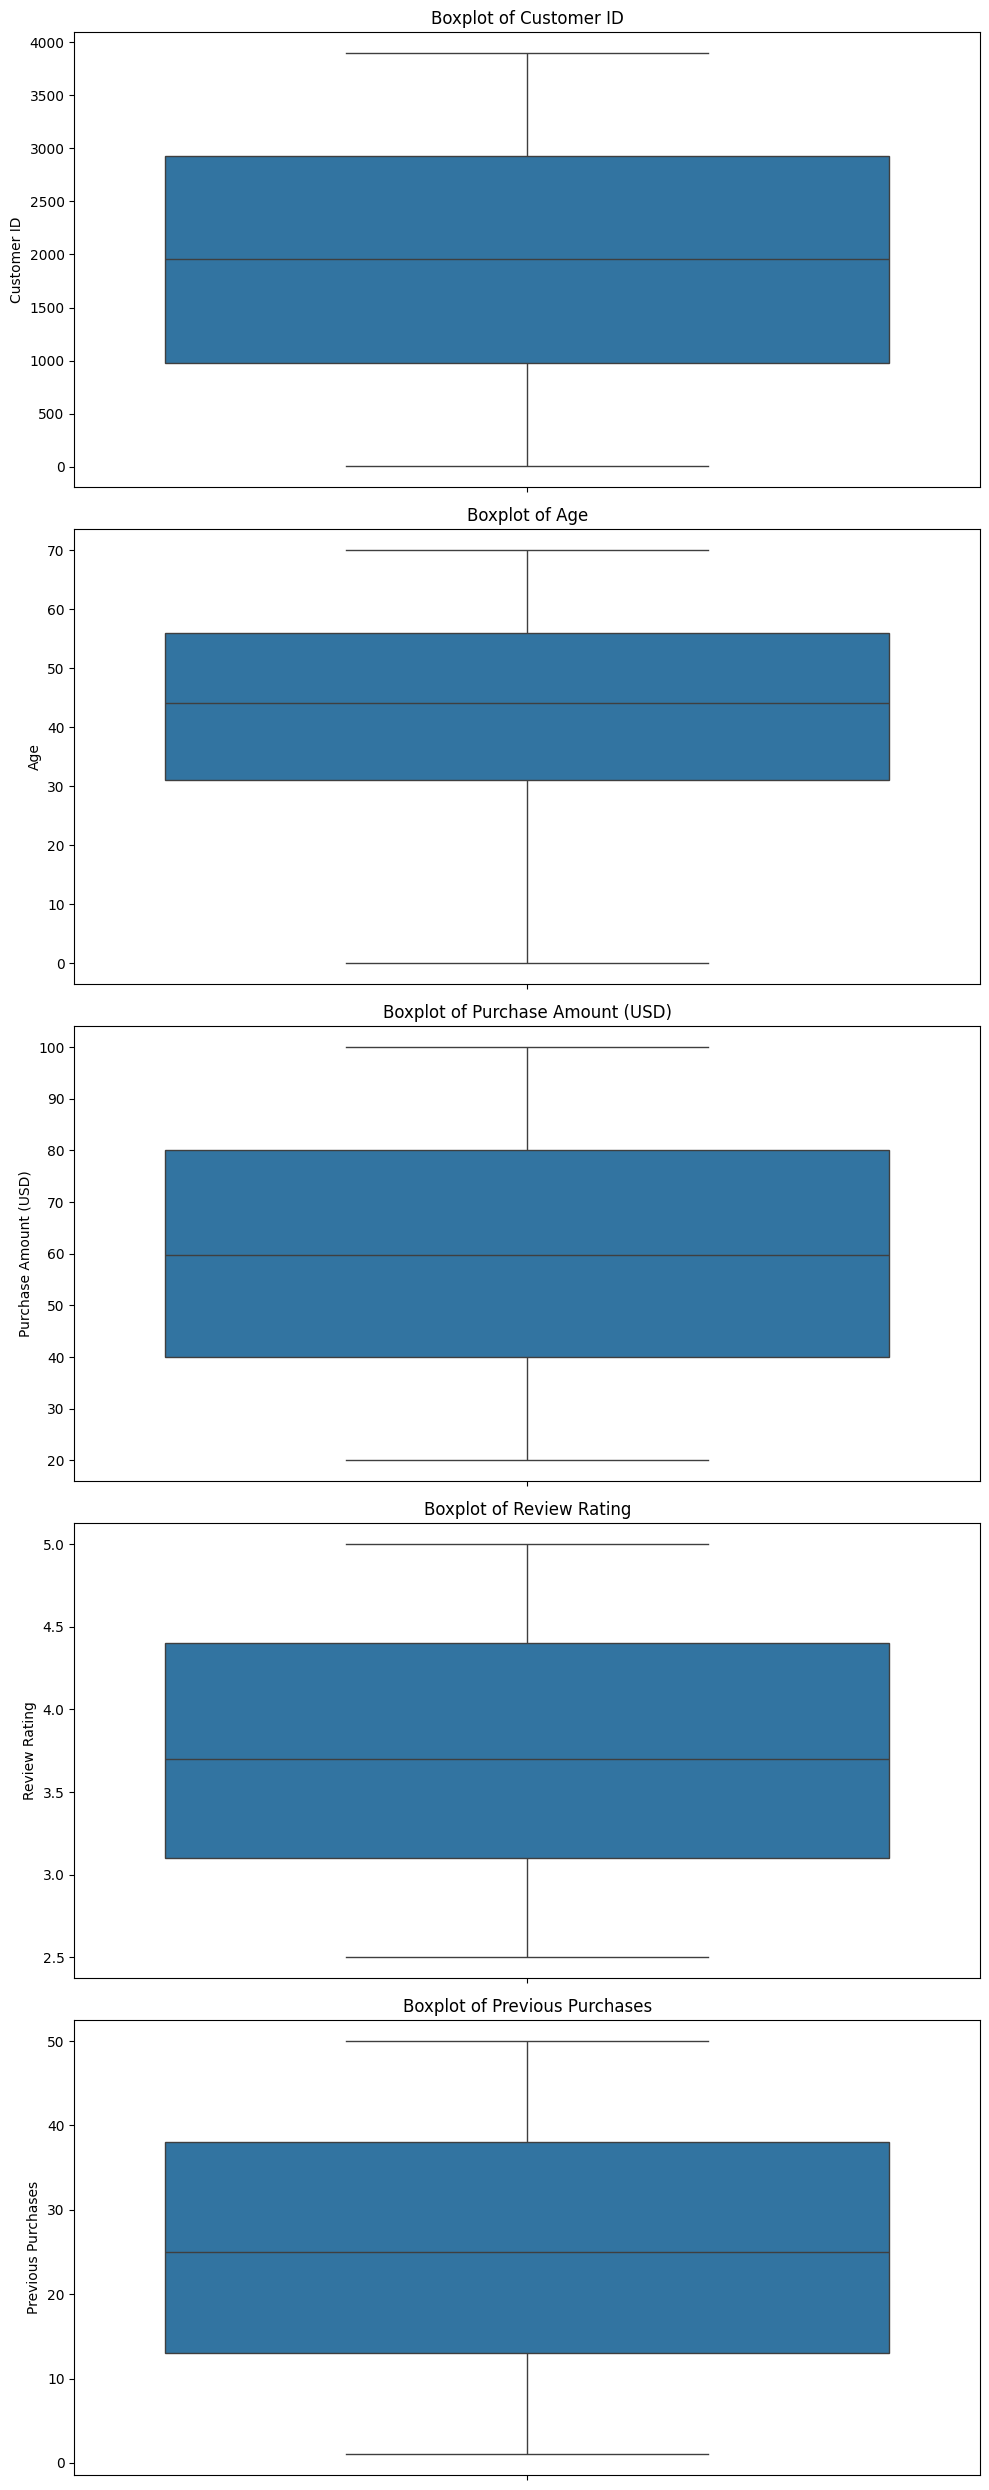

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 5 * len(numeric_cols)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(y=df[col])   # <-- vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()



**1. Mean Imputation**

Used to fill missing numeric values with the average of that column.

Before imputing, I checked for outliers because mean is sensitive to extreme values.

Since no outliers were found, mean is appropriate to keep data distribution stable.

Helps keep all rows without losing data.

**2. Mode Imputation**

Used to fill missing categorical values with the most common category (mode).

Suitable because categorical data can’t use mean or median.

Keeps data consistent by filling missing entries with the frequent category.

**3. Outlier Detection**

Outliers are extreme values that can distort analysis and imputation.

Detected using boxplots and the IQR method.

No significant outliers found, so mean imputation is safe for numeric columns.

Ensures the right imputation method and improves data quality.

In [64]:
# Save as CSV file
df.to_csv('cleaned_dataset.csv', index=False)
